# COMP5328 - Advanced Machine Learning

## Tutorial - Sparse Coding

**Semester 2, 2025**

**Objectives:**

* To learn about applications of sparse coding with dictionary learning.


**Instructions:**

* Exercises to be completed on Python 2.7 or Python 3.6.
* Scikit-learn library is installed within Anaconda.
* To run the cell you can press Ctrl-Enter or hit the Play button at the top. 

Lecturers: Tongliang Liu

## 1. Dictionary Learning

Dictionary learning aims to represent a vector $\mathbf{x} \in \mathbb{R}^n$ as a linear combination of a set of basis vectors ${\phi}_i$:
\begin{equation}
\mathbf{x} = \sum_{i=1}^k D_i {\phi}_i .
\end{equation}
For sparse coding, we wish to learn an **over-complete** set of basis vectors, i.e. $k > n$. The corresponding optimization objective is
\begin{equation}
\min_{D_i^{(j)},{\phi}_i} \sum_{j=1}^m (\Vert \mathbf{x}^{(j)}-\sum_{i=1}^k D_i^{(j)}\phi_i \Vert^2 + \alpha \sum_{i=1}^k S(D_i^{(j)})),
\end{equation}
where $S(\cdot)$ is a sparsity cost function, which could be chosen as $L_1$ penalty in practice.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [2]:
from sklearn.datasets import fetch_olivetti_faces

# Load faces data
faces = fetch_olivetti_faces()
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [3]:
images_faces = faces['images']
data_faces = faces.data

# The number and size of images
print('image size:\n',images_faces.shape,'\nimage data size:\n',data_faces.shape)
# Note that data are stored as design matrix

image size:
 (400, 64, 64) 
image data size:
 (400, 4096)


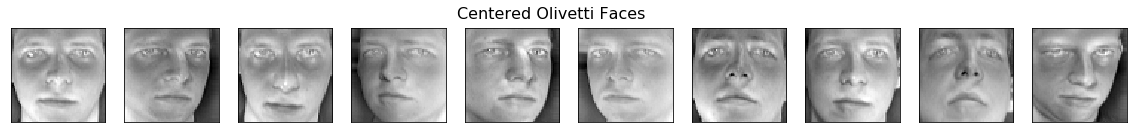

In [4]:
# Use a subsample for training
images_faces_train = images_faces[:350,:,:]
data_faces_train = data_faces[:350,:]

n_samples = len(images_faces_train)
image_shape = images_faces_train[0].shape

# global centering
data_faces_centered = data_faces_train - data_faces_train.mean(axis=0)
# local centering
data_faces_centered -= data_faces_centered.mean(axis=1).reshape(n_samples, -1)

# Let's show some centered faces
plt.figure(figsize=(20, 2))
plt.suptitle("Centered Olivetti Faces", size=16)
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(data_faces_centered[i].reshape(image_shape), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

### 1.1 Learning a dictionary

In consideration of computational time, we recommend setting the number of dictionaries to 100. For sparse coding problem, the number of dictionaries should be larger than the number of features. You will do an exercise using similar codes for sparse coding.

We use dictionary learning algorithm implemented in scikit-learn:

[sklearn.decomposition.MiniBatchDictionaryLearning()](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.MiniBatchDictionaryLearning.html)

In [5]:
from sklearn.decomposition import MiniBatchDictionaryLearning

time_start = time()
faces_dl = MiniBatchDictionaryLearning(n_components=100, alpha=0.1, n_iter=100, random_state=0)
data_faces_code = faces_dl.fit_transform(data_faces_centered)
time_training = (time() - time_start)

print("Training finished in %fs"%time_training)

Training finished in 26.101108s


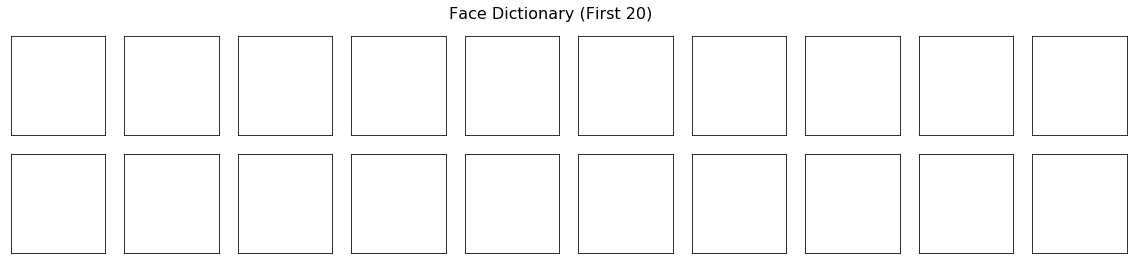

In [8]:
faces_dictionary = faces_dl.components_

plt.figure(figsize=(20, 4))
plt.suptitle("Face Dictionary (First 20)", size=16)
for i in range(20):
    plt.subplot(2, 10, i+1)
    # To do here (1), show the first 20 learned dictionary basis
    
    plt.xticks(())
    plt.yticks(())

The L1 norm of dictionary coder is : 58.159895771791895


NameError: name 'reconstructed_face' is not defined

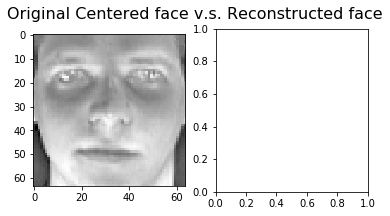

In [9]:
l1_norm = np.linalg.norm(data_faces_code[0],1,axis=0)
print ('The L1 norm of dictionary coder is : ' + str(l1_norm))
# To do here (2), reconstruct the face
 
plt.figure(figsize=(6, 3))
plt.suptitle("Original Centered face v.s. Reconstructed face", size=16)
plt.subplot(1, 2, 1)
plt.imshow(data_faces_centered[0].reshape(image_shape), cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_face, cmap=plt.cm.gray)

Get the coding on a test image

In [10]:
test_face_centered = data_faces[-1] - data_faces_train.mean(axis=0)
test_face_centered -= test_face_centered.mean()
test_face_centered = test_face_centered.reshape(1,-1)

Sparse coding implemented in scikit-learn:

[sklearn.decomposition.SparseCoder()](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparseCoder.html)

In [11]:
from sklearn.decomposition import SparseCoder

coder = SparseCoder(dictionary=faces_dictionary)
reconstructed_face_coder = coder.transform(test_face_centered)
# To do here (3), reconstruct the test face
reconstructed_face = 
l1_norm = np.linalg.norm(reconstructed_face_coder,1,axis=1)
print ('The L1 norm of dictionary coder is : ' + str(l1_norm))

plt.figure(figsize=(6, 3))
plt.suptitle("Original Centered face v.s. Reconstructed face", size=16)
plt.subplot(1, 2, 1)
plt.imshow(test_face_centered.reshape(image_shape), cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_face, cmap=plt.cm.gray)

SyntaxError: invalid syntax (<ipython-input-11-967789e6f22a>, line 6)

Exercise:

Try to decrease the $\alpha$ in the dictionary learning process and observe the change of L1 norm of dictionary coder.

### 1.2. Learning a dictionary from image patches

In [12]:
image_face = images_faces[1]

from sklearn.feature_extraction.image import extract_patches_2d

patch_size = (8, 8)
data_patches = extract_patches_2d(image_face, patch_size)
# Here we treat each patch as one example, and the sample is made up of 64 patches here.
# Learn the dictionaries of image patches (Coding should be sparse).
# Compare the difference between dictionaries learned from images and image patches.

data_patches = data_patches.reshape(data_patches.shape[0], -1)

# normalization
data_patches_centered = data_patches - data_patches.mean(axis=0)
data_patches_centered /= data_patches_centered.std(axis=0)

# sparce coding
patch_dl = MiniBatchDictionaryLearning(n_components=100, alpha=1, n_iter=500, random_state=0)
# To do here (4), learn the dictionary from patches

plt.figure(figsize=(6, 6))
plt.suptitle("Dictionary learned from face patches", size=16, y=0.92)
for i in range(len(patch_dictionary)):
    plt.subplot(10, 10, i+1)
    plt.imshow(patch_dictionary[i].reshape(patch_size), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
    
# Results are likw below
# You can check whether the coding is sparse

NameError: name 'patch_dictionary' is not defined

<Figure size 432x432 with 0 Axes>

In [13]:
original_face = np.zeros(image_face.shape)
reconstructed_face = np.zeros(image_face.shape)

sf = 8 #step factor for patch
sz = 8 #patch size is 8x8

data_new_patches = np.zeros((64,64))

for row in range(0,sf):
    for col in range(0,sf):
        data_new_patches[row*sf+col,:] = image_face[row*sf:(row+1)*sf,col*sf:(col+1)*sf].reshape(1,-1)

data_patches_centered = data_new_patches - data_patches.mean(axis=0)
data_patches_centered /= data_patches_centered.std(axis=0)

# To do here (5), obtain the dictionary code of the face


for row in range(0,sf):
    for col in range(0,sf):
        original_face[row*sf:(row+1)*sf,col*sf:(col+1)*sf] = data_patches_centered[row*sf+col,:].reshape(sz,sz)
        reconstructed_patch = dictionary_code[row*sf+col,:].dot(patch_dictionary).reshape(sz,sz)
        reconstructed_face[row*sf:(row+1)*sf,col*sf:(col+1)*sf] = reconstructed_patch

plt.figure(figsize=(6, 3))
plt.suptitle("Original Centered face v.s. Reconstructed face", size=16)
plt.subplot(1, 2, 1)
plt.imshow(original_face, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_face, cmap=plt.cm.gray)

## Note that in the images shows below, the border between image patches can be obviously seen. This is because of the
## local normalization of each patch.

NameError: name 'dictionary_code' is not defined